# Application with new data

This tutorial demonstrates how to pseudo-spatiotemporal analysis on BaristaSeq mouse visual cortex data using SODB and SpaceFlow.

A reference paper can be found at https://www.nature.com/articles/s41467-022-31739-w.

This tutorial refers to the following tutorial at https://github.com/hongleir/SpaceFlow/blob/master/tutorials/seqfish_mouse_embryogenesis.ipynb. At the same time, the way of loadding data is modified by using SODB.

## Import packages and set configurations

In [22]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Import several python packages commonly used in data analysis and visualization.
# numpy (imported as np) is a package for numerical computing with arrays.
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis.
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization.
import matplotlib.pyplot as plt
# seaborn (imported as sns) is a package for statistical data visualization, providing high-level interfaces for creating informative and attractive visualizations.
import seaborn as sns

In [24]:
# from SpaceFlow package import SpaceFlow module
from SpaceFlow import SpaceFlow

In [25]:
# Imports a palettable package
import palettable
# Create three variables with lists of colors for categorical visualizations and biotechnology-related visualizations, respectively.
cmp_pspace = palettable.cartocolors.diverging.TealRose_7.mpl_colormap
cmp_domain = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
cmp_ct = palettable.cartocolors.qualitative.Safe_10.mpl_colors

## Streamline development of loading spatial data with SOBD

In [26]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [27]:
# Initialize the sodb object
sodb = pysodb.SODB()

In [28]:
# Define names of the dataset_name and experiment_name
dataset_name = 'Sun2021Integrating'
experiment_name = 'Slice_1'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
#%%time
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[Slice_1] in dataset[Sun2021Integrating]


In [29]:
# Remove cells outside the VISp
adata = adata[adata.obs['layer']!='outside_VISp']
adata = adata[adata.obs['layer']!='VISp']

In [30]:
# Filter out genes
sc.pp.filter_genes(adata, min_cells=3)

## Perform SpaceFlow for pseudo-spatiotemporal analysis

In [31]:
# Create SpaceFlow Object
#%%time
#sf = SpaceFlow.SpaceFlow(adata=adata)    
sf = SpaceFlow.SpaceFlow(
    count_matrix=adata.X, 
    spatial_locs=adata.obsm['spatial'], 
    sample_names=adata.obs_names, 
    gene_names=adata.var_names
)

In [32]:
# Preprocess data
#%%time
sf.preprocessing_data(n_top_genes=3000)

In [33]:
# Train a deep graph network model
#%%time
sf.train(
    spatial_regularization_strength=0.1, 
    z_dim=50, 
    lr=1e-3, 
    epochs=1000, 
    max_patience=50, 
    min_stop=100, 
    random_seed=42, 
    gpu=0, 
    regularization_acceleration=True, 
    edge_subset_sz=1000000
)

Epoch 2/1000, Loss: 1.4427732229232788
Epoch 12/1000, Loss: 1.404854416847229
Epoch 22/1000, Loss: 1.355185866355896
Epoch 32/1000, Loss: 1.2782429456710815
Epoch 42/1000, Loss: 1.1435611248016357
Epoch 52/1000, Loss: 0.9432041049003601
Epoch 62/1000, Loss: 0.7149054408073425
Epoch 72/1000, Loss: 0.58223557472229
Epoch 82/1000, Loss: 0.5121980905532837
Epoch 92/1000, Loss: 0.4257865846157074
Epoch 102/1000, Loss: 0.37741923332214355
Epoch 112/1000, Loss: 0.33436518907546997
Epoch 122/1000, Loss: 0.31197986006736755
Epoch 132/1000, Loss: 0.26782554388046265
Epoch 142/1000, Loss: 0.2229880541563034
Epoch 152/1000, Loss: 0.2850548326969147
Epoch 162/1000, Loss: 0.2274121344089508
Epoch 172/1000, Loss: 0.23494650423526764
Epoch 182/1000, Loss: 0.19478872418403625
Epoch 192/1000, Loss: 0.2000330686569214
Epoch 202/1000, Loss: 0.2025863081216812
Epoch 212/1000, Loss: 0.1734076291322708
Epoch 222/1000, Loss: 0.22004571557044983
Epoch 232/1000, Loss: 0.17177501320838928
Epoch 242/1000, Loss: 0

array([[ 0.8851371   ,  0.016157504 ,  0.7868318   , ...,  0.5507122   ,
        -0.037691046 , -0.085605346 ],
       [ 0.7954141   ,  0.004558957 ,  0.7204991   , ...,  0.43139836  ,
        -0.0423048   , -0.062028013 ],
       [ 0.8919093   ,  0.013508907 ,  0.75929976  , ...,  0.5975924   ,
        -0.03786699  , -0.088618495 ],
       ...,
       [ 0.48230067  ,  0.01220826  ,  0.6489203   , ..., -0.0071663884,
         0.728559    ,  0.3234069   ],
       [ 0.5187084   ,  0.005628159 ,  0.6064961   , ..., -0.0019885437,
         0.45722297  ,  0.19440833  ],
       [ 0.4519184   ,  0.0027617402,  0.5260945   , ..., -0.0032663764,
         0.6188069   ,  0.404764    ]], dtype=float32)

In [34]:
# Idenfify the spatiotemporal patterns through pseudo-Spatiotemporal Map (pSM)
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)


Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [35]:
# Create a new column called 'pspace' from pSM values of cells or spots.
adata.obs['pspace'] = np.array(sf.pSM_values)

In [36]:
# Create a UMAP projection from SpaceFlow's embedding 
adata.obsm['embedding'] = sf.embedding
sc.pp.neighbors(adata, n_neighbors=20, use_rep='embedding')
sc.tl.umap(adata)

In [37]:
# directly using the pseudo_Spatiotemporal_Map function provided in the original github can potentially cause potential mis-picking of the root for diffusion-pseudo time
# sSince this dataset contains depth_um in obs, a iroot was set to be the cell with smallest depth_um. 
# For datasets without depth information, one can use the pseudo_Spatiotemporal_Map function
# Here set the iroot according to "depth_um"

# Select the root cell for trajectory inference based on its depth, by setting the index of the cell with the smallest 'depth_um' value as the root
adata.uns['iroot'] = np.argmin(adata.obs['depth_um'])
# Compute a diffusion map to captures the local graph structure
sc.tl.diffmap(adata)
# Use diffusion pseudotime (DPT) to infer a putative trajectory from the diffusion map, and assigns a pseudotime value to each cell that reflects its position along this trajectory.
sc.tl.dpt(adata)  

<Axes: title={'center': 'dpt_pseudotime'}, xlabel='X_umap1', ylabel='X_umap2'>

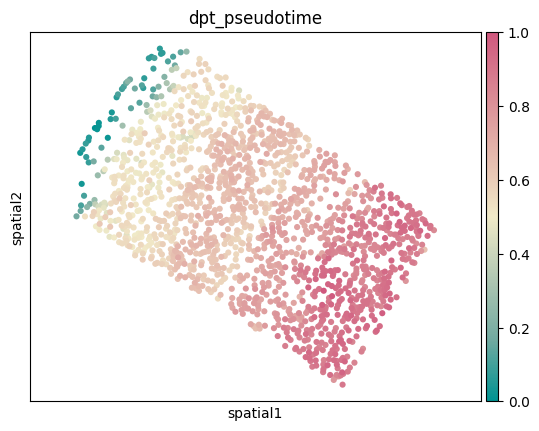

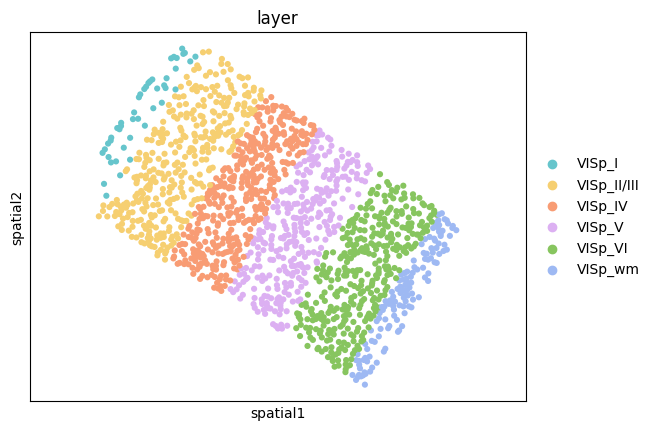

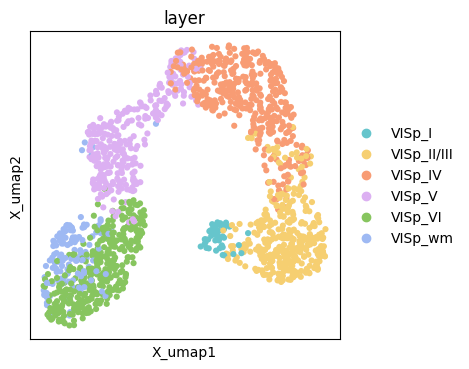

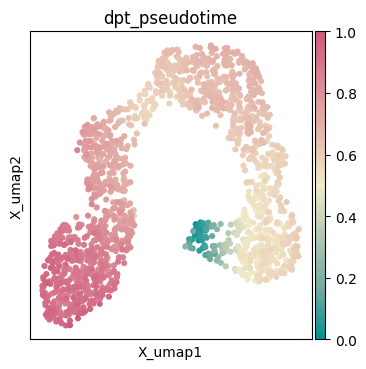

In [38]:
# Plot spatial embedding and UMAP embedding for diffusion pseudotime and layer(label), respectively

# si = 'Slice_1'

ax = sc.pl.embedding(adata,basis='spatial',color=['dpt_pseudotime'],show=False,color_map=cmp_pspace)
ax.axis('equal')
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_pspace.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_pspace.pdf',bbox_inches='tight',transparent=True,dpi=400)

ax = sc.pl.embedding(adata,basis='spatial',color='layer',show=False,palette=cmp_domain)
ax.axis('equal')
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_domain.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_domain.pdf',bbox_inches='tight',transparent=True,dpi=400)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sc.pl.embedding(adata,basis='X_umap',color='layer',show=False,palette=cmp_domain,ax=ax)
# ax.axis('equal')
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_UMAP_domain.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_UMAP_domain.pdf',bbox_inches='tight',transparent=True,dpi=400)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sc.pl.embedding(adata,basis='X_umap',color=['dpt_pseudotime'],show=False,color_map=cmp_pspace,ax=ax)
# ax.axis('equal')
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_UMAP_pspace.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_UMAP_pspace.pdf',bbox_inches='tight',transparent=True,dpi=400)



<Axes: xlabel='layer', ylabel='dpt_pseudotime'>

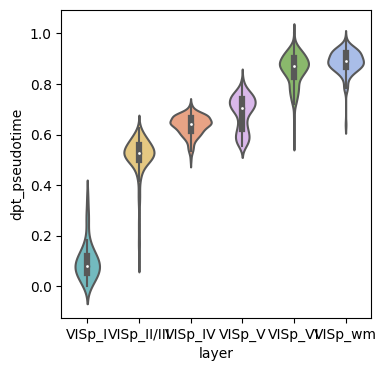

In [39]:
# Check whether the pseudo-spatiotemporal (dpt_pseudotime) value from infer increases according to the layer of the cortex

# adata_use = adata[adata.obs['layer']!='VISp_wm']
adata_use = adata
fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=adata_use.obs,x='layer',y='dpt_pseudotime',palette = adata_use.uns['layer_colors'],ax=ax)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_violin.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_violin.pdf',bbox_inches='tight',transparent=True,dpi=400)


In [40]:
adata.obs

,Slice,x,y,Dist to pia,Dist to bottom,Angle,unused-1,unused-2,x_um,y_um,depth_um,layer,leiden,pspace,dpt_pseudotime
20022,1,12186.20,8617.70,1029.630,205.270,174.894,0,0,1218.620,861.770,1093.752193,VISp_VI,1,0.911057,0.903116
20023,1,12789.10,8690.82,1072.540,168.011,172.700,0,0,1278.910,869.082,1139.629730,VISp_VI,4,0.891059,0.881497
20024,1,11927.80,8715.20,1003.280,231.018,177.522,0,0,1192.780,871.520,1066.880345,VISp_VI,1,0.928269,0.922105
20025,1,12860.60,8729.82,1075.760,165.770,172.700,0,0,1286.060,872.982,1143.373530,VISp_VI,4,0.895433,0.886377
20027,1,12587.60,8760.70,1052.380,187.131,172.700,0,0,1258.760,876.070,1119.019231,VISp_VI,3,0.908025,0.900265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230184,1,3239.60,8952.13,307.763,971.248,178.930,0,0,323.960,895.213,333.538252,VISp_II/III,4,0.712385,0.516408
230186,1,2713.10,9006.56,261.052,1018.700,177.579,0,0,271.310,900.656,286.855966,VISp_II/III,2,0.700709,0.506723
230187,1,2193.10,9009.00,214.572,1063.490,172.257,0,0,219.310,900.900,243.621417,VISp_II/III,0,0.779494,0.602101
230188,1,2405.97,9015.50,234.015,1045.450,171.641,0,0,240.597,901.550,260.900559,VISp_II/III,0,0.724525,0.527561


In [41]:
adata_use.uns['layer_colors']

['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3']

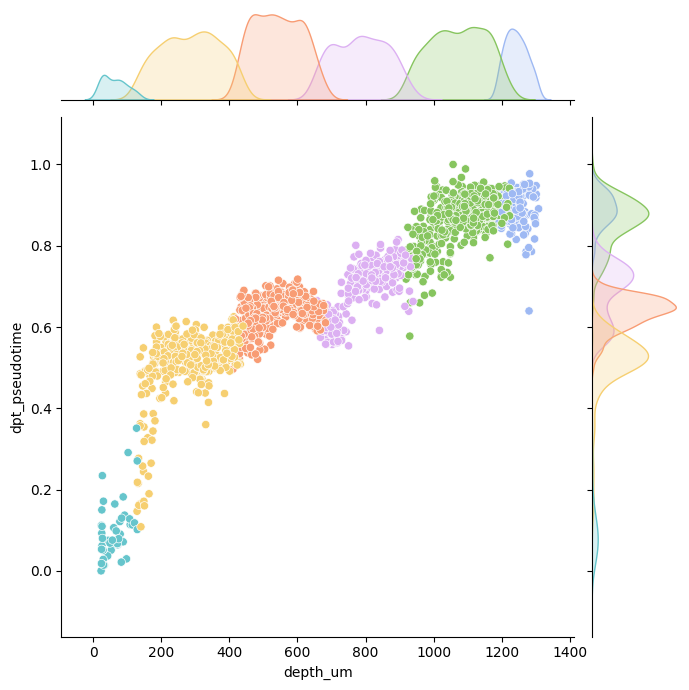

In [42]:
# Check whether the pseudo-spatiotemporal (dpt_pseudotime) from infer was correlated with their depth_um (depth_um)

adata_use = adata
g = sns.jointplot(x="depth_um", y="dpt_pseudotime", data=adata_use.obs,hue='layer',
                  palette=list(adata_use.uns['layer_colors']),
                  # kind="reg", 
                  # truncate=False,
                  # xlim=(0, 60), ylim=(0, 12),
                  # color="m", 
                  height=7)
g.ax_joint.legend_.remove()
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_jointplot.png',bbox_inches='tight',transparent=True,dpi=400)
# plt.savefig(f'../figures/pspace/BaristaSeq_{si}_jointplot.pdf',bbox_inches='tight',transparent=True,dpi=400)
